# Gemma Instrucked

In [1]:
!pip install keras-nightly keras-hub-nightly --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.1/898.1 kB 59.9 MB/s eta 0:00:00


In [2]:
import os

os.environ["KERAS_BACKEND"] = "jax"
# Free up more GPU memory on the Jax and TensorFlow backends.
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "1.00"

import keras
import keras_hub
import kagglehub
import numpy as np

kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [6]:
gemma_lm = keras_hub.models.CausalLM.from_preset(
    "gemma3_instruct_4b",
    dtype="bfloat16",
)

100%|██████████| 1.84k/1.84k [00:00<00:00, 3.05MB/s]


100%|██████████| 5.55k/5.55k [00:00<00:00, 9.21MB/s]


100%|██████████| 4.47M/4.47M [00:00<00:00, 17.5MB/s]


100%|██████████| 8.79G/8.79G [02:19<00:00, 67.9MB/s]


In [3]:
PROMPT_TEMPLATE = """<start_of_turn>user
{}<end_of_turn>
<start_of_turn>model
"""

In [4]:
prompt = "Why can't you assign values in Jax tensors? Be brief!"

In [7]:
gemma_lm.generate(PROMPT_TEMPLATE.format(prompt), max_length=512)

"<start_of_turn>user\nWhy can't you assign values in Jax tensors? Be brief!<end_of_turn>\n<start_of_turn>model\nJax tensors are immutable. You can't directly assign new values to them; instead, you create new tensors with the desired values through operations like `jax.numpy.where` or broadcasting.<end_of_turn>"

8495035/8495035 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


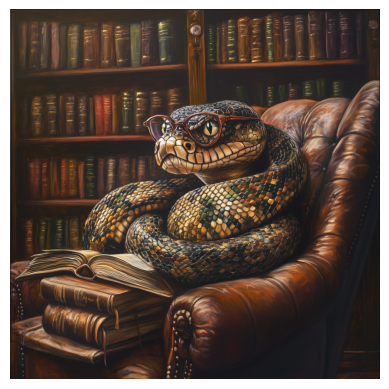

In [8]:
import matplotlib.pyplot as plt

image_url = (
    "https://github.com/mattdangerw/keras-nlp-scripts/"
    "blob/main/learned-python.png?raw=true"
)
image_path = keras.utils.get_file(origin=image_url)

image = np.array(keras.utils.load_img(image_path))
plt.axis("off")
plt.imshow(image)
plt.show()

In [9]:
 gemma_lm.preprocessor.max_images_per_prompt = 1
 gemma_lm.preprocessor.sequence_length = 512
 prompt = "What is going on in this image? Be concise!<start_of_image>"
 gemma_lm.generate({
    "prompts": PROMPT_TEMPLATE.format(prompt),
    "images": [image],
})


'<start_of_turn>user\nWhat is going on in this image? Be concise!\n\n<start_of_image>\n\n<end_of_turn>\n<start_of_turn>model\nA snake wearing glasses is sitting in a leather armchair, surrounded by a large bookshelf, and reading a book. It’s a whimsical, slightly surreal image.<end_of_turn>'

In [10]:
prompt = """Judy wrote a 2-page letter to 3 friends twice a week for 3 months.
How many letters did she write?
Be brief, and add "ANSWER:" before your final answer."""

gemma_lm.compile(sampler="random")

In [11]:
gemma_lm.generate(PROMPT_TEMPLATE.format(prompt))

'<start_of_turn>user\nJudy wrote a 2-page letter to 3 friends twice a week for 3 months.\nHow many letters did she write?\nBe brief, and add "ANSWER:" before your final answer.<end_of_turn>\n<start_of_turn>model\nHere\'s how to calculate the number of letters:\n\n* **Letters per week:** 3 friends * 2 letters/week = 6 letters\n* **Letters per month:** 6 letters/week * 4 weeks/month = 24 letters\n* **Total letters:** 24 letters/month * 3 months = 72 letters\n\nANSWER: 72<end_of_turn>'

In [12]:
gemma_lm.generate(PROMPT_TEMPLATE.format(prompt))

'<start_of_turn>user\nJudy wrote a 2-page letter to 3 friends twice a week for 3 months.\nHow many letters did she write?\nBe brief, and add "ANSWER:" before your final answer.<end_of_turn>\n<start_of_turn>model\nHere\'s how to solve the problem:\n\n* **Letters per week:** 3 friends * 2 letters/week = 6 letters/week\n* **Letters per month:** 6 letters/week * 4 weeks/month = 24 letters/month\n* **Letters in 3 months:** 24 letters/month * 3 months = 72 letters\n* **Total letters:** 72 letters * 2 = 144 letters\n\nANSWER: 144<end_of_turn>'